In [119]:
def data_analysis_pipeline():
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, mean_squared_error, r2_score
    from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.impute import SimpleImputer
    from sklearn.decomposition import PCA

    data_path = input("Please enter the path to your data file (CSV format): ")
    data = pd.read_csv(data_path)

    for col in data.select_dtypes(include=['object']).columns:
        data[col] = LabelEncoder().fit_transform(data[col])

    target_column = input("Please enter the name of the target column: ")

    def eda(data):
        data = data.copy()
        imputer = SimpleImputer(strategy='mean')
        data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
        
        for col in data.columns:
            plt.figure(figsize=(10, 4))
            sns.boxplot(x=data[col])
            plt.title(f'Boxplot for {col}')
            plt.show()
            plt.figure(figsize=(10, 4))
            sns.countplot(x=data[col])
            plt.title(f'Count Plot for {col}')
            plt.xticks(rotation=45)
            plt.show()

        plt.figure(figsize=(12, 8))
        sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.show()
        
        print("Exploratory Data Analysis completed.")

    def feature_engineering(data):
        scaler = StandardScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
        pca = PCA(n_components=2)
        pca_data = pca.fit_transform(data_scaled.drop(columns=[target_column]))
        plt.figure(figsize=(10, 6))
        plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data[target_column], cmap='viridis')
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.title("PCA Scatter Plot")
        plt.show()
        print("Feature Engineering completed.")

    def model_training(data, target_column):
        X = data.drop(columns=[target_column])
        y = data[target_column]
        task_type = 'classification' if len(np.unique(y)) < 20 else 'regression'
        
        if task_type == 'classification':
            model = RandomForestClassifier()
            param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
            scoring = 'accuracy'
        else:
            model = RandomForestRegressor()
            param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
            scoring = 'neg_mean_squared_error'
        
        grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        if task_type == 'classification':
            print(classification_report(y_test, y_pred))
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            plt.bar(['Accuracy', 'F1 Score', 'Recall'], [accuracy, f1, recall])
            plt.title('Classification Metrics')
        else:
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            plt.bar(['MSE', 'R2 Score'], [mse, r2])
            plt.title('Regression Metrics')
        plt.show()

    eda(data)
    
    cont = input("Would you like to proceed with Feature Engineering? (yes/no): ")
    if cont.lower() == 'yes':
        feature_engineering(data)

    cont = input("Would you like to proceed with Model Training and Evaluation? (yes/no): ")
    if cont.lower() == 'yes':
        model_training(data, target_column)


Please enter the path to your data file (CSV format):  Breast_Cancer.csv
Please enter the name of the target column:  Status


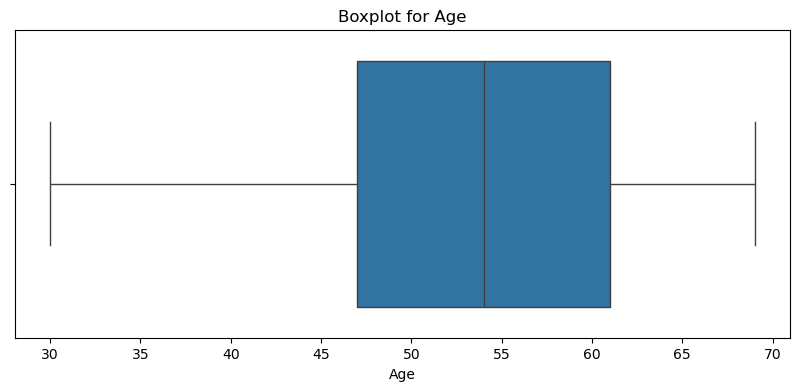

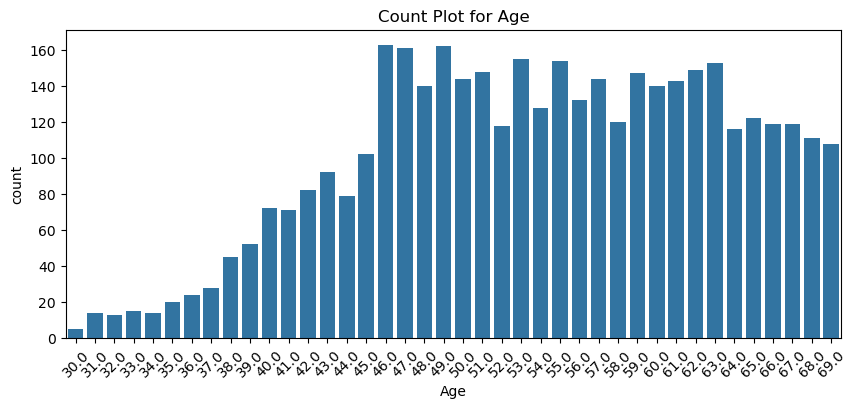

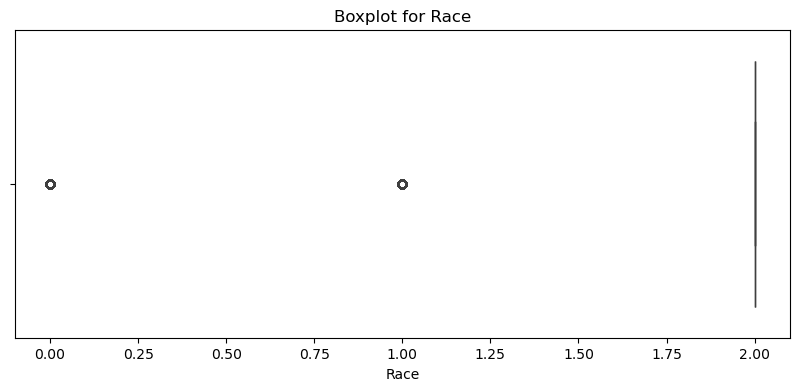

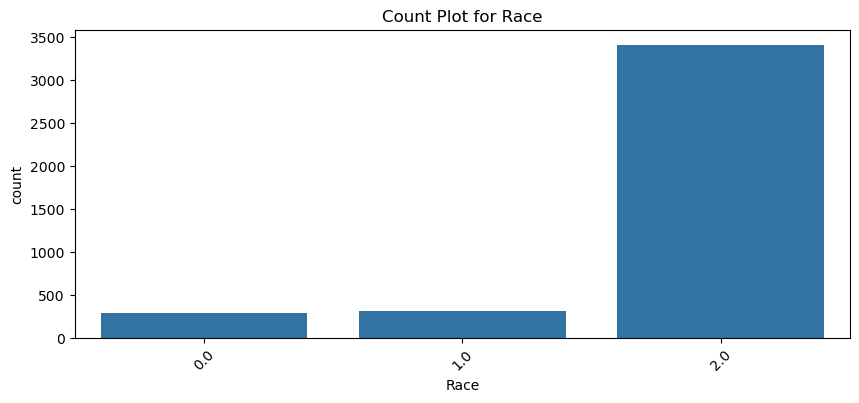

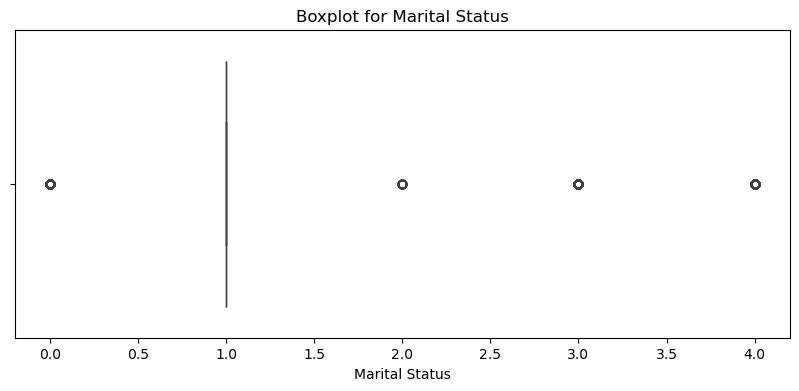

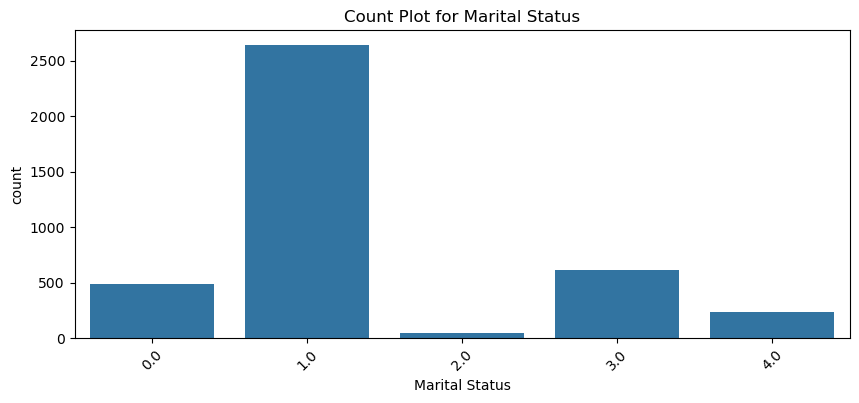

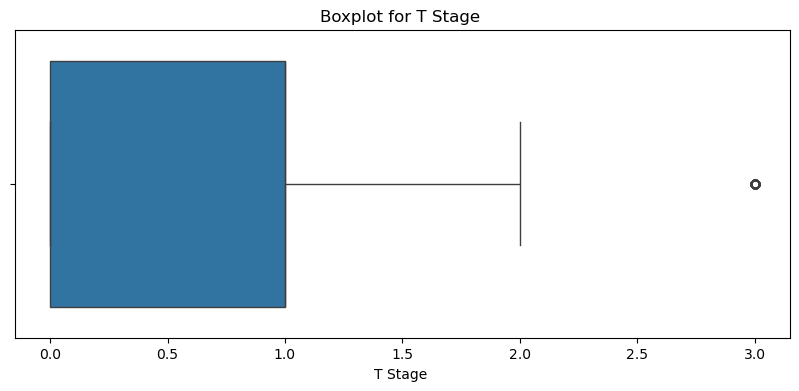

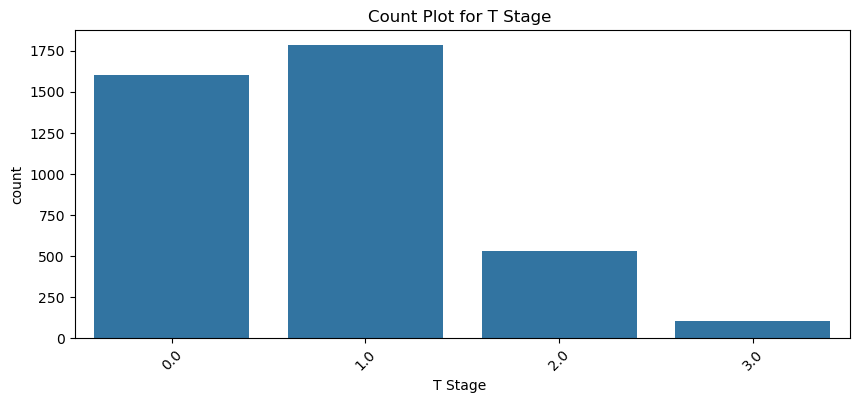

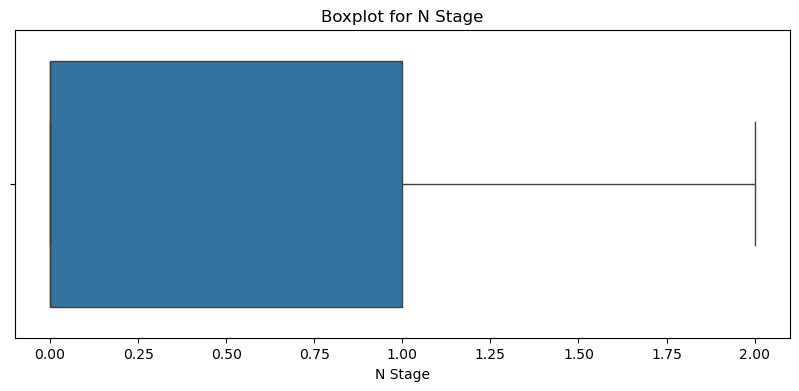

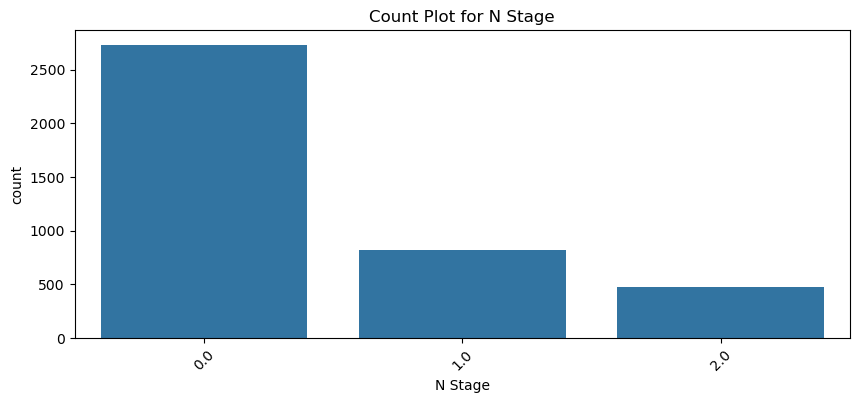

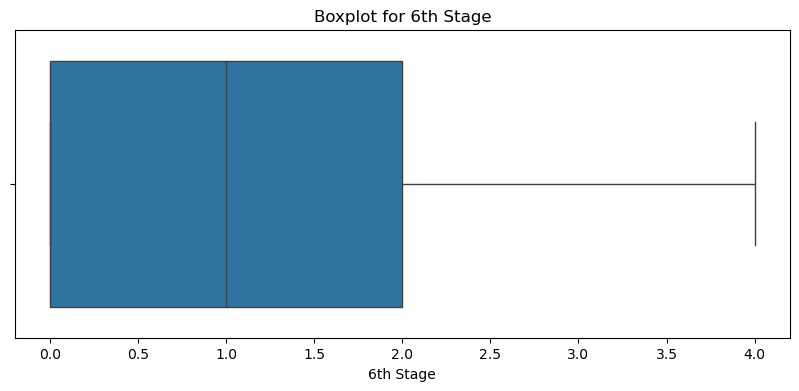

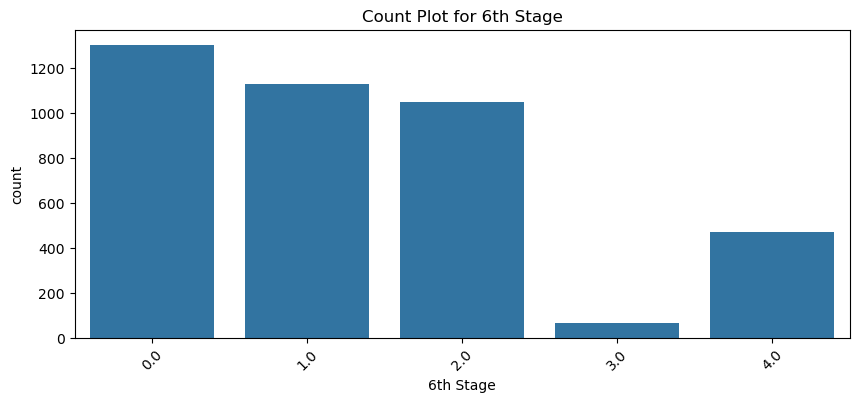

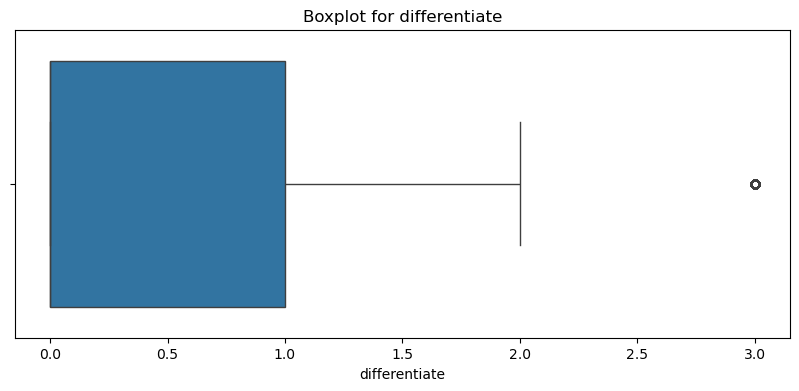

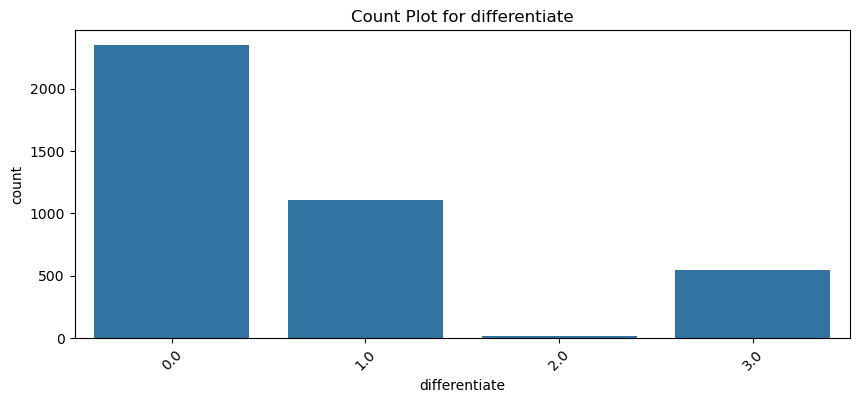

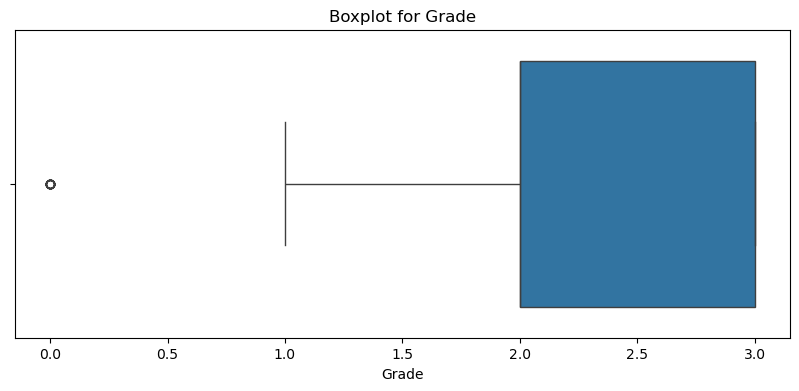

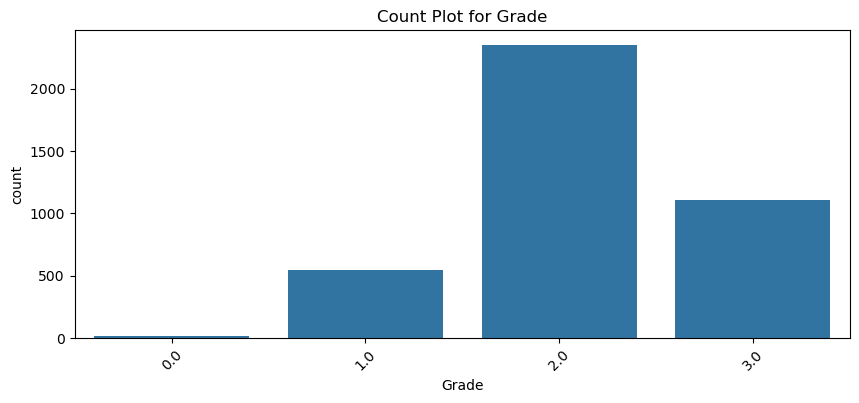

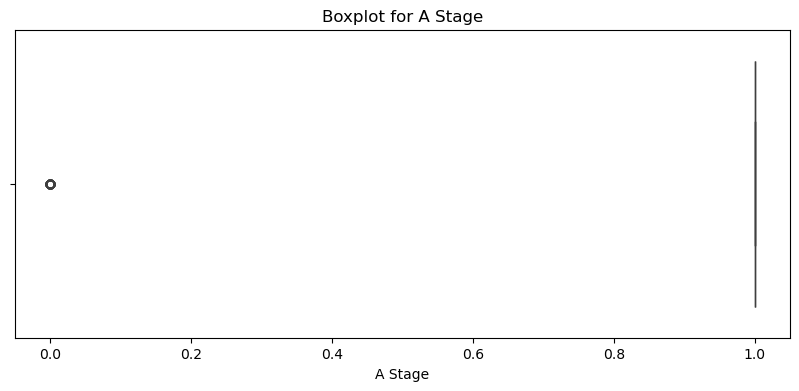

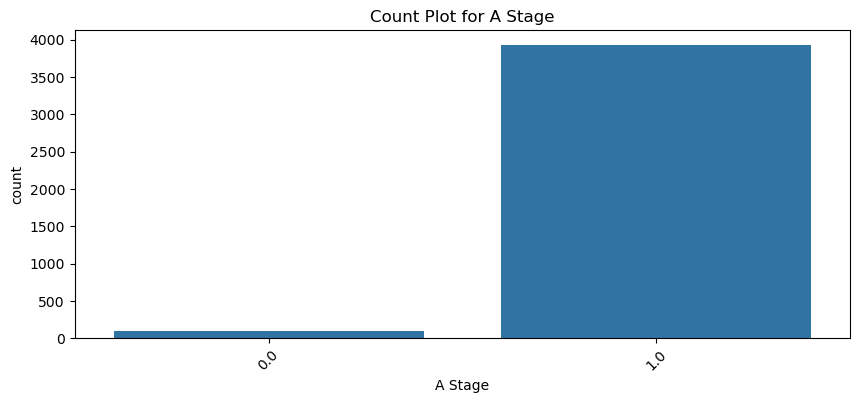

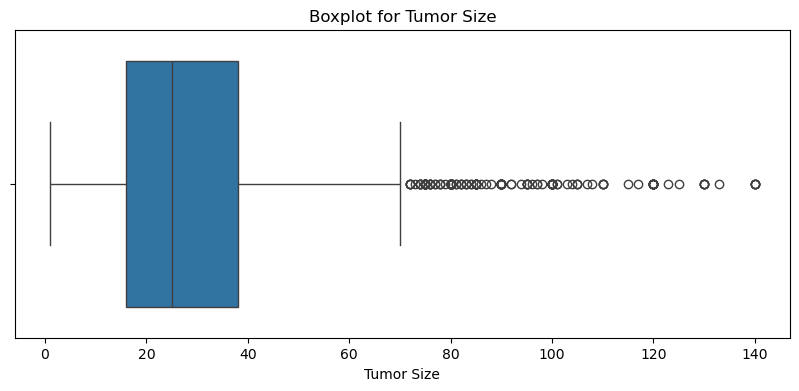

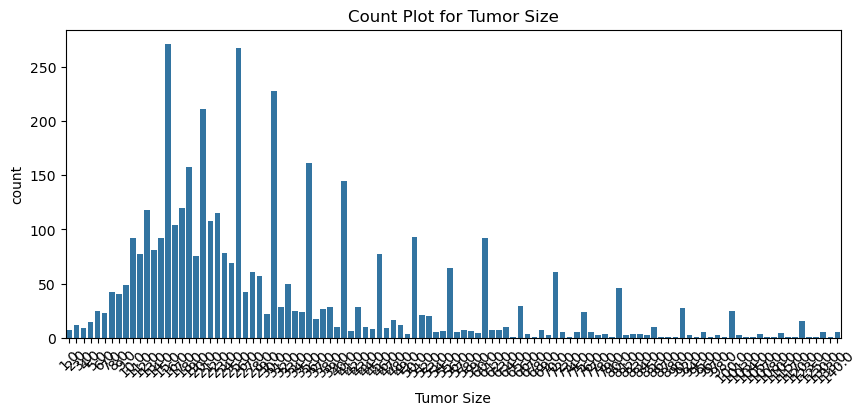

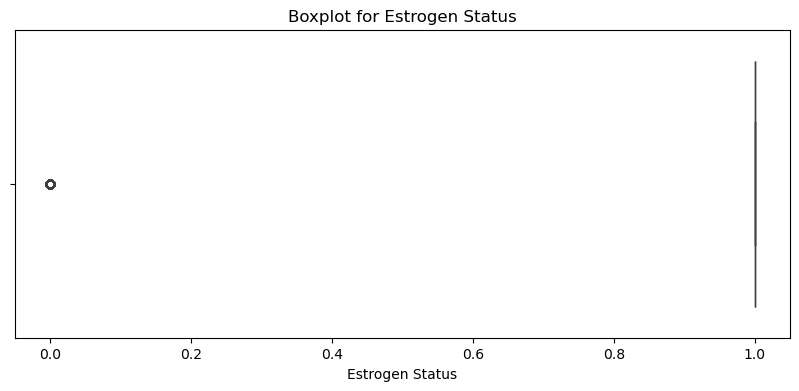

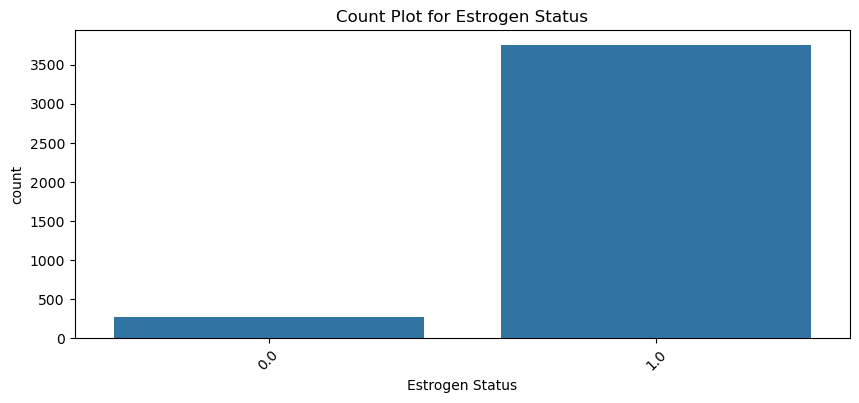

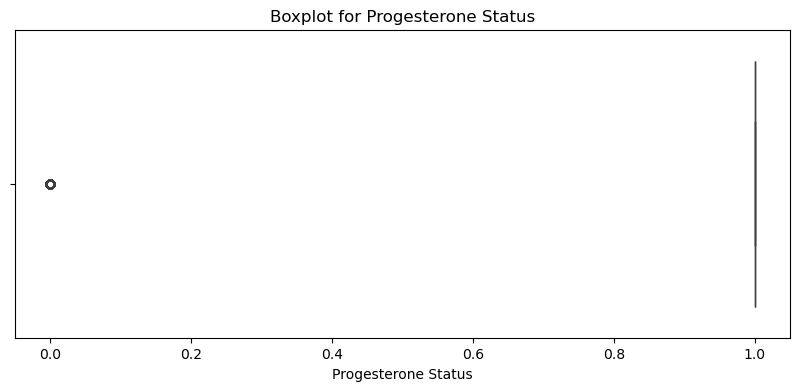

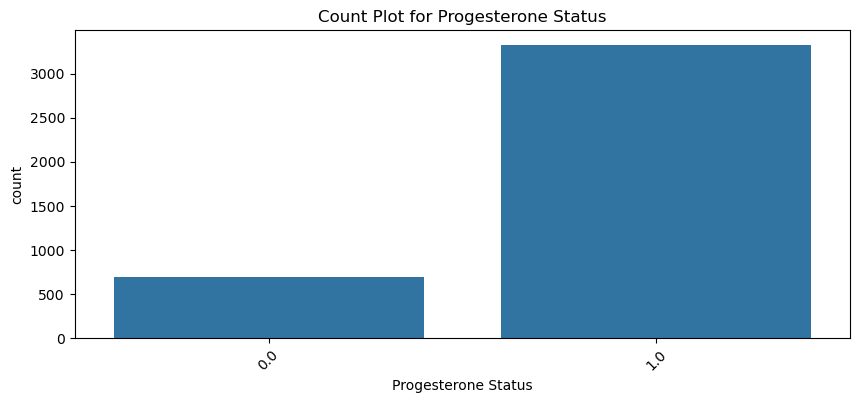

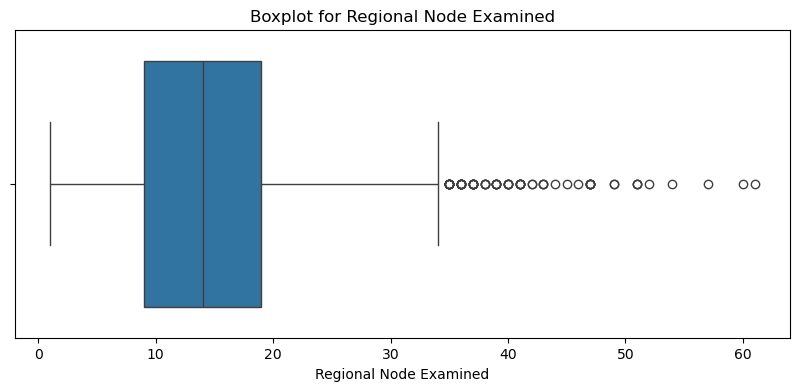

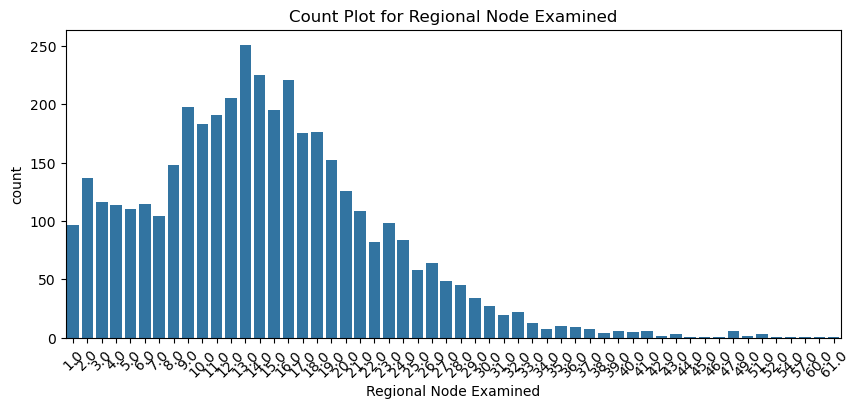

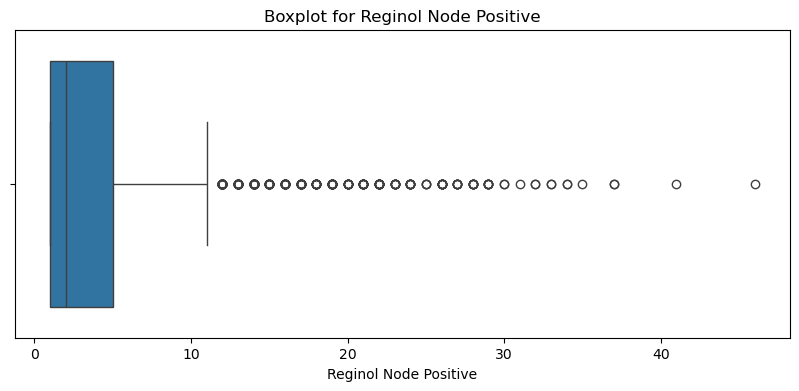

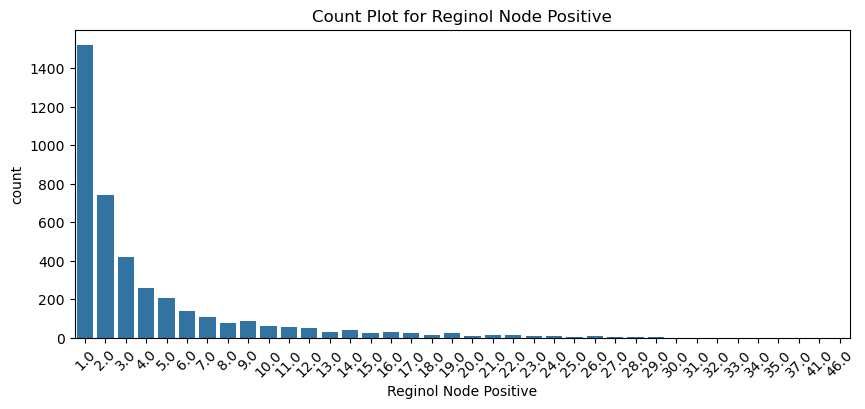

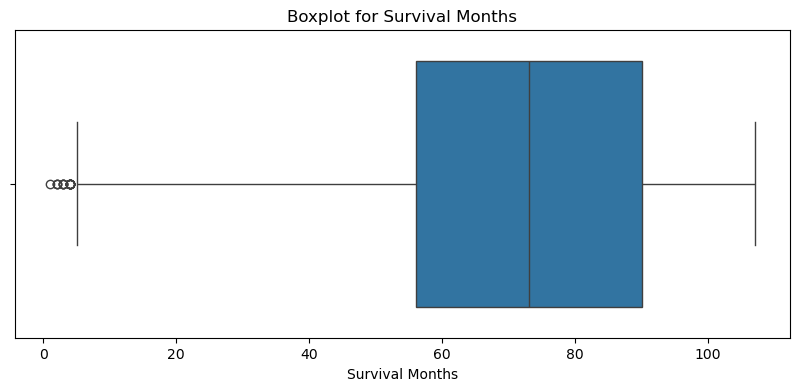

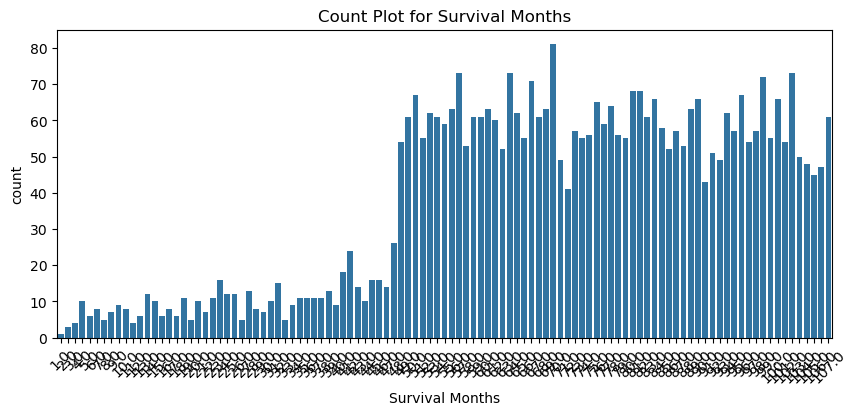

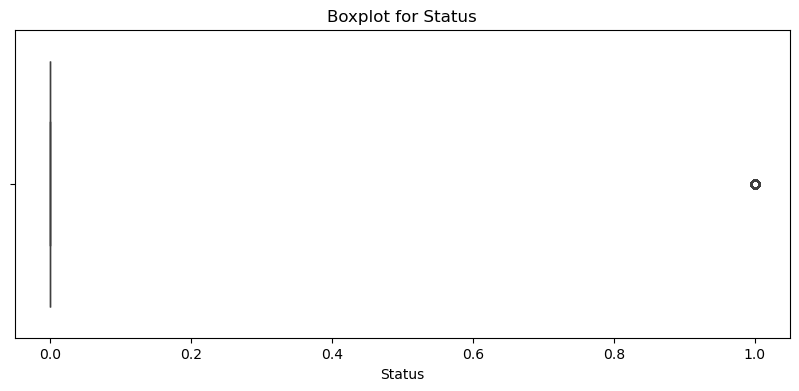

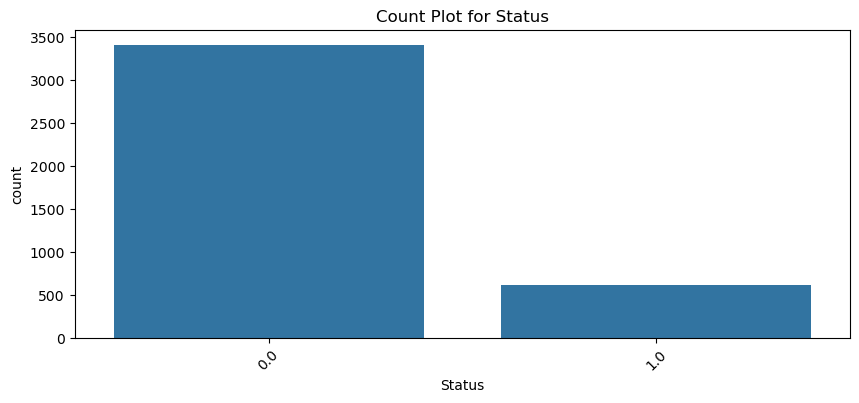

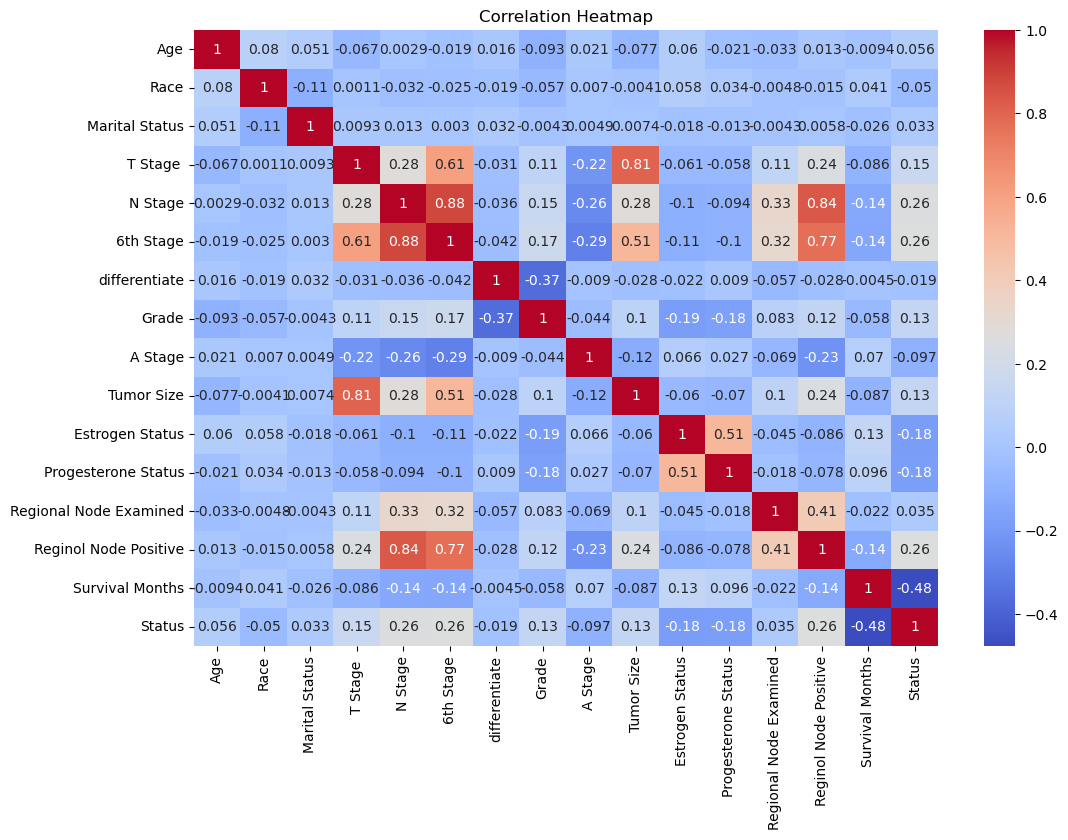

Exploratory Data Analysis completed.


In [ ]:
data_analysis_pipeline()